In [1]:
from azureml.core import Workspace
from azureml.core.dataset import Dataset
import pandas as pd
import math
import numpy as np

In [2]:
artifacts = pd.read_csv('evaluation.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 106326


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,qrcode,id,storage_path,height,weight,muac,scan_group,key,tag,age,sex
0,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,100,good,808,female
1,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,101,good,808,female
2,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,102,good,808,female
3,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,100,good,808,female
4,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,101,good,808,female


In [12]:
artifacts.describe()

,height,weight,muac,key,age,Years
count,106326.000000,106326.000000,106326.000000,106326.000000,106326.000000,106326.000000
mean,88.606433,11.491345,14.092647,107.434569,1204.457743,3.293305
std,10.254950,2.357475,1.057554,24.552888,428.141734,1.226324
min,10.500000,4.400000,10.000000,100.000000,0.000000,0.000000
25%,81.900000,9.750000,13.400000,101.000000,894.000000,2.000000
50%,89.600000,11.550000,14.100000,101.000000,1240.000000,3.000000
75%,95.800000,13.150000,14.800000,102.000000,1547.000000,4.000000
max,192.200000,19.950000,17.700000,202.000000,2121.000000,6.000000


In [3]:
## function to convert the days into age
def age(row):
    in_years= row['age']/365
    return round(in_years)

In [4]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(age,axis=1)
artifacts.head()

,qrcode,id,storage_path,height,weight,muac,scan_group,key,tag,age,sex,Years
0,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,100,good,808,female,2
1,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,101,good,808,female,2
2,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,102,good,808,female,2
3,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,100,good,808,female,2
4,1585012883-9c7qb46z18,Z0iXfLI26pdmChvR_artifact-scan-pcd_15717024000...,qrcode/1585012883-9c7qb46z18/measure/159184878...,79.0,8.55,12.7,test,101,good,808,female,2


In [5]:
scans = artifacts.drop_duplicates(subset='qrcode',keep ='first')
print("Total no. of children:", len(scans))

Total no. of children: 3000


4    796
3    756
5    569
2    549
1    308
0     17
6      5
Name: Years, dtype: int64


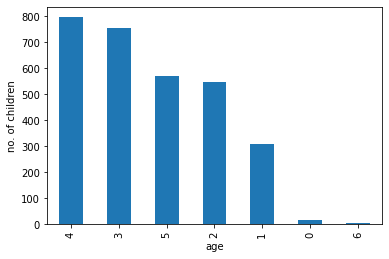

In [6]:
age_ax = scans['Years'].value_counts().plot(kind='bar')
age_ax.set_xlabel('age')
age_ax.set_ylabel('no. of children')
print(scans['Years'].value_counts())

101    50723
100    24540
102    24218
201     2693
200     2084
202     2068
Name: key, dtype: int64


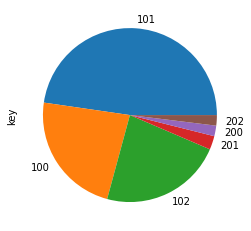

In [7]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
artifacts['key'].value_counts().plot(kind='pie')

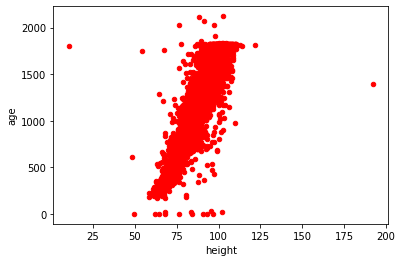

In [8]:
#distribution of height against age
heightvsage = scans.plot.scatter(x='height',
                      y='age',
                      c='red')

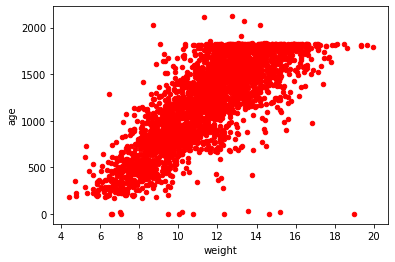

In [9]:
#distribution of weight against age
weightvsage = scans.plot.scatter(x='weight',
                      y='age',
                      c='red')

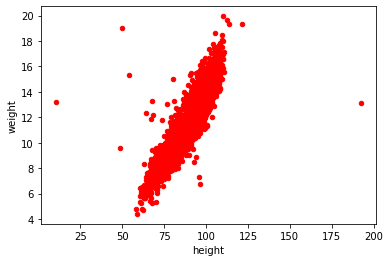

In [10]:
## distribution of height against weight
weightvsheight = scans.plot.scatter(x='height',
                      y='weight',
                      c='red')

In [15]:
tag = artifacts.groupby(['qrcode','tag']).mean()
tag

height     weight       muac         key  \
qrcode                tag                                                  
1583462505-43bak4gvfa bad    94.755285  13.243902  14.743902  100.837398   
                      good   95.459471  13.210132  14.501762  100.735683   
1583462533-hxipp8enl2 good  104.562722  13.686095  13.129586  100.964497   
1583462828-2dmyjcwrkp bad    94.265761  12.393478  15.100000  101.114130   
                      good   94.233766  11.951299  15.068831  100.818182   
...                                ...        ...        ...         ...   
1598381173-f80mmnxe33 good   70.700000   6.900000  12.500000  202.000000   
1598381979-a0r8k65mw4 bad    93.700000  11.800000  14.700000  101.291667   
                      good   93.700000  11.800000  14.700000  100.000000   
1598382355-k5eyhov4bu bad    92.000000  11.400000  14.300000  101.000000   
                      good   92.000000  11.400000  14.300000  100.923077   

                               age  Years  
qrcode                tag                  
1583462505-43bak4gvfa bad   1310.0    4.0  
                      good  1310.0    4.0  
1583462533-hxipp8enl2 good  1510.0    4.0  
1583462828-2dmyjcwrkp bad   1298.0    4.0  
                      good  1298.0    4.0  
...                            ...    ...  
1598381173-f80mmnxe33 good   508.0    1.0  
1598381979-a0r8k65mw4 bad   1232.0    3.0  
                      good  1232.0    3.0  
1598382355-k5eyhov4bu bad   1350.0    4.0  
                      good  1350.0    4.0  

[4579 rows x 6 columns]

In [64]:
tag.iloc[tag.index.get_level_values('qrcode') == '1583462505-43bak4gvfa']

height     weight       muac         key  \
qrcode                tag                                                 
1583462505-43bak4gvfa bad   94.755285  13.243902  14.743902  100.837398   
                      good  95.459471  13.210132  14.501762  100.735683   

                               age  Years  
qrcode                tag                  
1583462505-43bak4gvfa bad   1310.0    4.0  
                      good  1310.0    4.0

In [55]:
tag.index[1][0]
# a = pd.DataFrame(tag.index)
# a

'1583462505-43bak4gvfa'

In [20]:
delete = tag.iloc[tag.index.get_level_values('tag') == 'delete']
delete

,,height,weight,muac,key,age,Years
qrcode,tag,,,,,,
1583831095-qwmm1mmr33,delete,73.6,8.05,14.1,100.000000,641.0,2.0
1583997996-dahj59a5bu,delete,91.7,12.00,14.9,101.000000,1276.0,3.0
1584249719-uoibvyjllm,delete,69.1,7.05,13.2,200.000000,370.0,1.0
1584994118-vi6zfw8kbe,delete,69.5,6.70,12.1,202.000000,319.0,1.0
1585000742-6m2xj8r3f3,delete,85.8,10.55,13.4,101.000000,931.0,3.0
...,...,...,...,...,...,...,...
1598220609-1jjshis20f,delete,84.0,10.50,13.1,101.000000,973.0,3.0
1598234741-izsh2i32fn,delete,83.2,8.85,12.1,101.000000,1608.0,4.0
1598241851-x52r32wwfj,delete,78.2,8.90,14.6,101.428571,603.0,2.0


In [45]:
good = tag.query("tag == 'good'")
good_qrc = good.index.get_level_values('qrcode')
len(good_qrc)

2765

In [39]:
bad = tag.query("tag == 'bad'")
bad_qrc = bad.index.get_level_values('qrcode')

In [69]:
total_good = list(set(list(good_qrc)) - set(list(bad_qrc)))
total_bad = list(set(list(bad_qrc)) - set(list(good_qrc)))

In [70]:
print("Total good scans",len(total_good))
print("Total bad scans",len(total_bad))

Total good scans 1248
Total bad scans 235


In [67]:
total_good[10]

'1585360156-pgioyzd9tm'

In [68]:
search = tag.iloc[tag.index.get_level_values('qrcode') == '1585360156-pgioyzd9tm']
search

,,height,weight,muac,key,age,Years
qrcode,tag,,,,,,
1585360156-pgioyzd9tm,good,94.5,12.45,13.9,101.0,1438.0,4.0


In [ ]:
le

In [36]:
delete.index.get_level_values('qrcode')

Index(['1583831095-qwmm1mmr33', '1583997996-dahj59a5bu',
       '1584249719-uoibvyjllm', '1584994118-vi6zfw8kbe',
       '1585000742-6m2xj8r3f3', '1585011746-wp7p1irz40',
       '1585013629-37es7x8nzp', '1585120745-ozcvruh4t0',
       '1585120970-euobrj4j16', '1585219047-c3t9se4dm4',
       '1585271291-ae722v2ths', '1585273355-7n4haa4dj2',
       '1585273573-66adr9iet8', '1585275024-qjifs3otf9',
       '1585275549-a84jbsepgp', '1585294277-cdb57jj0je',
       '1585294445-nrw5kevrwq', '1585296590-v6uhkhwsqb',
       '1585296715-anwxpch6nq', '1585296748-v4h6jw0jsr',
       '1585296804-8tq5qj3px5', '1585297634-58ykln14hm',
       '1585297649-gxiy0enrix', '1585297671-4557p5fehv',
       '1585350507-fsz1v7d3yw', '1585351945-u33w9wes0e',
       '1585352167-db85dtpshe', '1585353242-h6xc5810mp',
       '1585360095-tglykqtxux', '1585361275-o5v6krug62',
       '1585361447-kesr295isz', '1585362140-08kydim224',
       '1585362299-q8daiz7wab', '1585362387-8ehx04r2f6',
       '1585365696-hx01no82tc',

In [37]:
len(delete)

62

In [29]:
delqrc[1][0]

'1583997996-dahj59a5bu'

In [21]:
delete.iloc[delete.index.get_level_values('qrcode')]

ValueError: invalid literal for int() with base 10: '1583831095-qwmm1mmr33'